In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [218]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [219]:
data = heart_df.copy()

In [220]:
data.shape

(1025, 14)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [222]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [223]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [224]:
data.groupby('sex')['age'].mean()

sex
0    55.849359
1    53.814867
Name: age, dtype: float64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

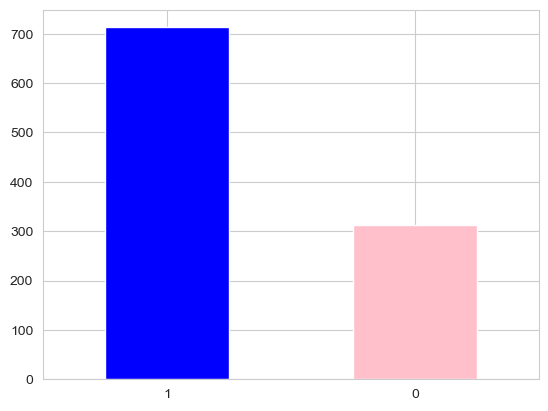

In [225]:
data['sex'].value_counts().plot(kind= 'bar', color= ['blue', 'pink'])
plt.xticks(rotation=0)

In [226]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [227]:
data.shape[0]

1025

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [229]:
oldpeak_median=data['oldpeak'].median()
oldpeak_median

0.8

In [230]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

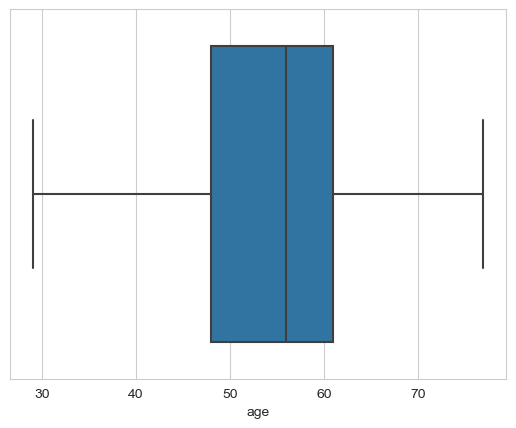

In [231]:
sns.boxplot(data=data,
           x='age')
plt.show

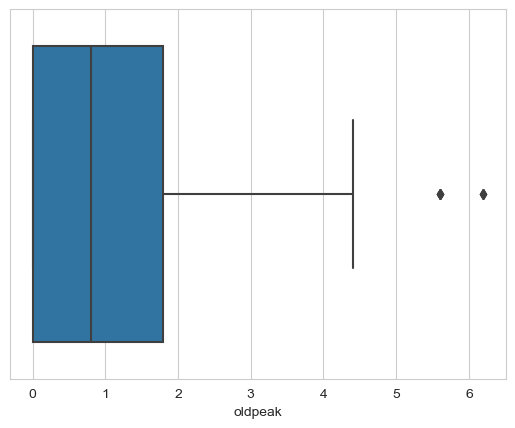

In [232]:
sns.boxplot(data=data,
           x= 'oldpeak')
plt.show()

In [233]:
Q1 = data['oldpeak']. quantile (0.25)
Q3 = data['oldpeak']. quantile (0.75)
Q1,Q3

(0.0, 1.8)

In [234]:
IQR = Q3-Q1
IQR

1.8

In [235]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2.7, 4.5)

In [236]:
data[(data['oldpeak']> upper_limit)|(data['oldpeak']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [237]:
data.shape

(1025, 14)

In [238]:
data_1 =data[(data['oldpeak']<=upper_limit)&(data['oldpeak'] > lower_limit)]
data_1.shape

(1018, 14)

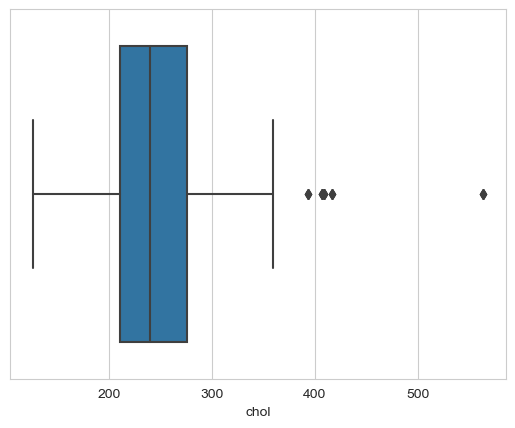

In [239]:
sns.boxplot(data=data_1, x= 'chol')
plt.show()

In [240]:
Q1 = data_1['chol']. quantile (0.25)
Q3 = data_1['chol']. quantile (0.75)
Q1,Q3

(211.0, 275.75)

In [241]:
IQR = Q3 - Q1
IQR

64.75

In [242]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit, upper_limit

(113.875, 372.875)

In [243]:
data_1[(data_1['chol']> upper_limit) | (data_1['chol']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [244]:
data_2 = data_1[(data_1['chol']<= upper_limit) & (data_1['chol'] >= lower_limit)]
data_2.shape

(1002, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

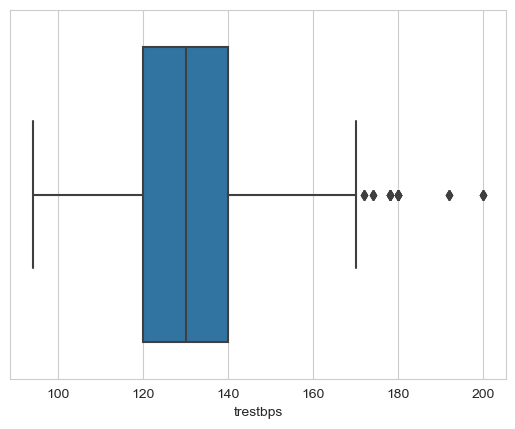

In [245]:
sns.boxplot(data=data_2, x= 'trestbps')
plt.show

In [246]:
Q1 = data_2['trestbps']. quantile (0.25)
Q3 = data_2['trestbps']. quantile (0.75)
Q1,Q3

(120.0, 140.0)

In [247]:
IQR = Q3 - Q1
IQR

20.0

In [248]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit , upper_limit

(90.0, 170.0)

In [249]:
data_2.thal.unique()

array([3, 2, 1, 0], dtype=int64)

In [250]:
data_2[(data_2['trestbps']> upper_limit) | (data_2['trestbps']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [251]:
data_3 = data_2[(data_2['trestbps']<= upper_limit) & (data_2['trestbps']> lower_limit)]
data_3.shape

(972, 14)

### ToDO
- Check outliers for age, trestbps, chol, thalach, and oldpeak.
- perform feature scaling on the categorical columns.
- Build a simple logistic regression model and evaluate the models using the accuracy score, classification report and confusion matrix.

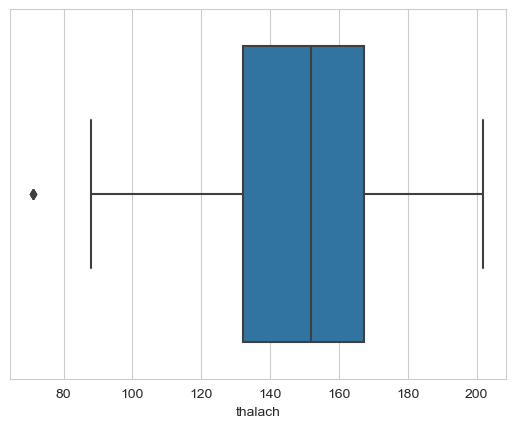

In [252]:
sns.boxplot(data = data_3, x = 'thalach')
plt.show()

In [253]:
Q1 = data_3['thalach']. quantile(0.25)
Q3 = data_3['thalach']. quantile(0.75)
Q1,Q3

(132.0, 167.25)

In [254]:
IQR =Q3 - Q1
IQR

35.25

In [255]:
lower_limit =Q1 - 1.5*IQR
upper_limit =Q3 + 1.5*IQR
lower_limit, upper_limit

(79.125, 220.125)

In [256]:
data_3[(data['thalach']> upper_limit) | (data_3['thalach']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [257]:
data_4 = data_3[(data_3['thalach']<= upper_limit) & (data_3['thalach']> lower_limit)]
data_4.shape

(968, 14)

In [258]:
new_data = data_4.copy()

In [259]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [260]:
new_data['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [261]:
new_data['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. , 0.9,
       1.8, 3.4, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3, 3.5])

In [262]:
new_data['sex'].unique()

array([1, 0], dtype=int64)

In [263]:
x = new_data.drop('target', axis = 1)
y = new_data['target']

In [264]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [265]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [266]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [267]:
le= LabelEncoder()
new_data['trestbps'] = le.fit_transform(new_data['trestbps'])
new_data['trestbps'].unique

<bound method Series.unique of 0       18
1       28
2       31
3       33
4       27
        ..
1020    28
1021    18
1022     8
1023     8
1024    14
Name: trestbps, Length: 968, dtype: int64>

In [268]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,18,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,28,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,31,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,33,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,27,294,1,1,106,0,1.9,1,3,2,0


In [269]:
new_data['target'].value_counts(normalize = True)

1    0.524793
0    0.475207
Name: target, dtype: float64

In [270]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [271]:
x_scaled = sc.transform(x)
x_scaled

array([[-0.22728287,  0.62994079, -0.93387239, ...,  0.97518257,
         1.22183379,  1.11687593],
       [-0.11766163,  0.62994079, -0.93387239, ..., -2.33121578,
        -0.72987431,  1.11687593],
       [ 1.74589933,  0.62994079, -0.93387239, ..., -2.33121578,
        -0.72987431,  1.11687593],
       ...,
       [-0.77538903,  0.62994079, -0.93387239, ..., -0.6780166 ,
         0.24597974, -0.48956671],
       [-0.44652533, -1.58745079, -0.93387239, ...,  0.97518257,
        -0.72987431, -0.48956671],
       [-0.0080404 ,  0.62994079, -0.93387239, ..., -0.6780166 ,
         0.24597974,  1.11687593]])

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=42)

In [274]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((774, 13), (194, 13), (774,), (194,))

In [275]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [276]:
reg.score(x_test, y_test)

0.8556701030927835

In [277]:
reg.score(x_train, y_train)

0.8540051679586563

In [278]:
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [279]:
y_pred_proba = reg.predict_proba(x_test)
y_pred_proba[:10]

array([[0.03292697, 0.96707303],
       [0.06944598, 0.93055402],
       [0.99704156, 0.00295844],
       [0.9326791 , 0.0673209 ],
       [0.11591116, 0.88408884],
       [0.42732061, 0.57267939],
       [0.30935387, 0.69064613],
       [0.85970387, 0.14029613],
       [0.2214232 , 0.7785768 ],
       [0.9152355 , 0.0847645 ]])